# Section B : (Scratch Implementation)


## References :
1. https://medium.com/@amannagrawall002/batch-vs-stochastic-vs-mini-batch-gradient-descent-techniques-7dfe6f963a6f

2. https://medium.com/@poojaviveksingh/all-about-min-max-scaling-c7da4e0044c5

3. https://colab.research.google.com/drive/1H2mIoqlDKk8a5jRBjnEwXvAw1AOmTtgN#scrollTo=HFUIp1_Lx5h_

4. https://colab.research.google.com/drive/17agIP-8meFnimBuCXTpbvo41vZGfqVcK#scrollTo=gXxml6eOelXA

5. https://www.reddit.com/r/learnmachinelearning/comments/vjoo1r/should_you_scale_your_features_before_the/

6. https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

7. https://www.geeksforgeeks.org/implementation-of-logistic-regression-from-scratch-using-python/

8. https://github.com/divyajeettt/CSE343/blob/main/Assignment-1/utils.py

9. https://github.com/arnav10goel/CSE343-ML-Assignments/blob/main/2021519_HW1/2021519_Q3/2021519_Q3.ipynb

**Imp** : https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing :

The data is checked for Null values and the Null values are dropped from the data

In [ ]:
'''
Loading the data
'''

df = pd.read_csv("Heart Disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


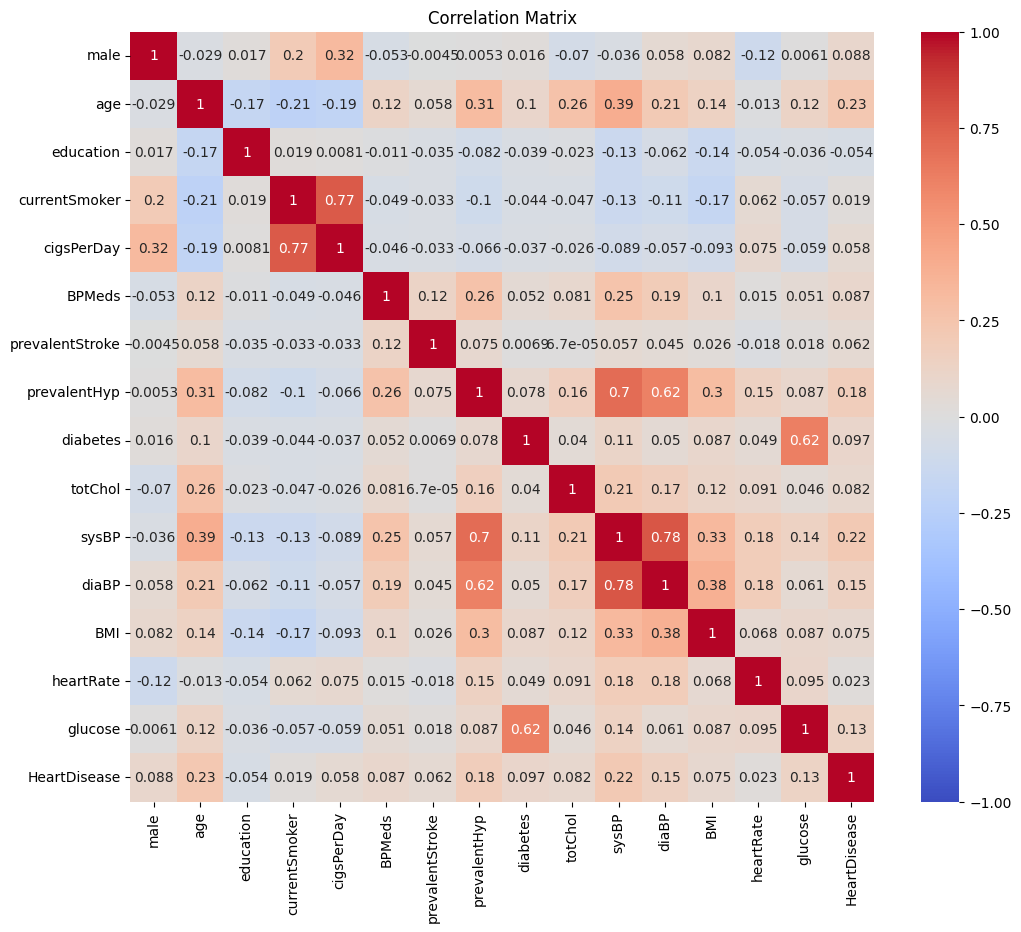

In [ ]:
'''
Drawing coorelation matrix to see if theree is a need to drop any feature , though didnot drop any
'''

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

target = 'HeartDisease'
target_correlation = df.corr()[target].sort_values(ascending=False)


### Even though currentSmoker and cigsperDAY are coming to highly correlated but would not remove it since it would not make much difference to my results

In [ ]:
'''
NULL value check
'''

df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
'''
There is not categorical data to encode
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
'''
Dropping NULL values
'''

df = df.dropna()

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
temp = df
y1 = temp["HeartDisease"].values
X1 = temp.drop(columns=['HeartDisease']).values

In [ ]:
y = df["HeartDisease"].values
X = df.drop(columns=['HeartDisease']).values

In [ ]:
X

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [ ]:
'''
A function for train , test and valuation split : 70:15:15 (train: test: validation)
'''

def train_test_val_split(X,y):
    index = np.random.permutation(X.shape[0])
    X = X[index]
    y = y[index]

    X_train = X[:int(0.7 * X.shape[0])]
    y_train = y[:int(0.7 * y.shape[0])]
    X_val = X[int(0.7 * X.shape[0]):int((0.85) * X.shape[0])]
    y_val = y[int(0.7 * y.shape[0]):int((0.85) * y.shape[0])]
    X_test = X[int((0.85) * X.shape[0]):]
    y_test = y[int((0.85) * y.shape[0]):]

    return (X_train,y_train),(X_val,y_val),(X_test,y_test)

In [ ]:
(X_train, y_train), (X_val, y_val),(X_test, y_test) = train_test_val_split(X, y)  # For part a

In [ ]:
'''
However, used inbuilt train-test split function because it gave better results
'''

from sklearn.model_selection import train_test_split

X_train4, X_temp4, y_train4, y_temp4 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val4, X_test4, y_val4, y_test4 = train_test_split(X_temp4, y_temp4, test_size=0.5, random_state=42)

X_train5, X_temp5, y_train5, y_temp5 = train_test_split(X, y, test_size=0.3, random_state=42)
X_val5, X_test5, y_val5, y_test5 = train_test_split(X_temp5, y_temp5, test_size=0.5, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
Using an inbuilt scalar also gave better results than implemented scalar
'''

scaler = StandardScaler()

X_train4 = scaler.fit_transform(X_train4)
X_val4 = scaler.transform(X_val4)
X_test4 = scaler.transform(X_test4)

In [ ]:
X_train4

array([[-0.90843252, -0.54163481,  0.00722181, ..., -0.49047571,
        -0.90134195, -1.18192251],
       [-0.90843252,  1.08435889,  0.97988579, ..., -0.0608415 ,
        -0.31569364, -0.22267858],
       [-0.90843252, -0.07706518, -0.96544217, ..., -0.7392113 ,
         1.35758725, -0.83310653],
       ...,
       [ 1.10079723, -0.30935   ,  1.95254977, ...,  0.60999085,
        -2.3236307 , -0.26628058],
       [ 1.10079723,  0.38750444,  0.00722181, ...,  0.48939177,
        -0.73401386,  0.95457532],
       [ 1.10079723,  0.03907722,  0.00722181, ...,  1.27831072,
        -1.31966217, -0.57149455]])

In [ ]:
(X_train3,y_train3),(X_val3,y_val3),(X_test3,y_test3) = train_test_val_split(X,y)   # For part b

In [ ]:
print("Train Features Shape: ", X_train.shape)
print("Train Labels Shape: ", y_train.shape)
print("Test Features Shape: ", X_test.shape)
print("Test Labels Shape: ", y_test.shape)
print("Validation Features Shape: ", X_val.shape)
print("Validation Labels Shape: ", y_val.shape)

Train Features Shape:  (2559, 15)
Train Labels Shape:  (2559,)
Test Features Shape:  (549, 15)
Test Labels Shape:  (549,)
Validation Features Shape:  (548, 15)
Validation Labels Shape:  (548,)


In [ ]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        """
        Computing the mean and standard deviation for each feature in the training data.
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        """
        Transforming the data by subtracting the mean and dividing by the standard deviation.
        """
        if self.mean is None or self.std is None:
            raise ValueError("The scaler is not fitted ")
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        """
        Fitting to the data and then transform it.
        """
        self.fit(X)
        return self.transform(X)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.90843252, -0.64312805,  0.02341775, ..., -1.61771653,
        -0.04686171,  1.60622283],
       [-0.90843252,  1.107313  , -0.95897595, ...,  0.03454314,
        -1.28654922, -0.21220297],
       [-0.90843252, -0.0596477 , -0.95897595, ...,  0.51257079,
         1.68870081, -0.07582104],
       ...,
       [-0.90843252, -0.75982412,  1.00581144, ...,  0.20369138,
         0.53165913,  0.24240348],
       [ 1.10079723,  1.92418549,  0.02341775, ...,  0.43657665,
        -0.46009088,  1.69714412],
       [ 1.10079723, -1.57669661,  1.98820514, ...,  0.97834132,
        -0.29479921, -0.30312426]])

## Part A

## Implementing Batch Gradient Descent from Scratch
# Sigmoid Function

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where \( z \) is the input to the sigmoid function.

## Binary Cross-Entropy Loss

The binary cross-entropy loss, averaged over \( m \) samples, is given by:

$$
L(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- \( m \) is the number of samples,
- \( y_i \) is the true label for sample \( i \) (0 or 1),
- \( \hat{y}_i \) is the predicted probability for sample \( i \).





In [ ]:
'''
The following below code implements the batch gradient descent , first the derivates are evaluated to update the weights and the bias of the model ,
then following losses and accuracies are calculated using sigmoid and binary cross entropy loss function

'''

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    '''
    Calculating Binary cross entropy loss
    '''
    epsilon = 1e-9  # to avoid log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    m = len(y_true)
    loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def accuracy(y_true, y_pred):
    '''
    Computing the accuracy
    '''
    return np.mean((y_pred > 0.5) == y_true)

def derivates(X_train, y_pred, y_train, m ):
    '''
    Computing the gradients
    '''
    dw = (1 / m) * np.dot(X_train.T, y_pred - y_train)
    db = (1 / m) * np.sum(y_pred - y_train)

    return dw,db

def losses(y_train,y_train_pred,y_val,y_val_pred):
    train_loss = cross_entropy_loss(y_train, y_train_pred)
    val_loss = cross_entropy_loss(y_val, y_val_pred)

    return train_loss,val_loss

def accuracies(y_train_pred,y_train,y_val_pred,y_val):
    '''
    Calculating the true accuracies from estimating the predicted values
    '''
    train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
    val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

    return train_accuracy,val_accuracy


def logistic_regression_batch(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate, num_iterations=1000):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):

        y_pred = sigmoid(np.dot(X_train, weights) + bias)

        dw,db = derivates(X_train, y_pred, y_train, m)

        '''
        Updating the weights
        '''

        weights -= learning_rate * dw
        bias -= learning_rate * db

        '''
        calculating the loss and accuracies
        '''

        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss,val_loss = losses(y_train,y_train_pred,y_val,y_val_pred)
        train_accuracy,val_accuracy = accuracies(y_train_pred,y_train,y_val_pred,y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    y_test_pred = sigmoid(np.dot(X_test, weights) + bias)
    test_accuracy = accuracy(y_test, y_test_pred)

    print()
    print(f"Final Test Accuracy: {test_accuracy}")

    return weights , bias , train_losses, val_losses, train_accuracies, val_accuracies



### Analysing and drawing graphs for different values of alphas and epochs

alpha = 0.001 , epochs = 1000

In [ ]:
weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression_batch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.6929976162879273, Validation Loss: 0.6930030594269606, Train Accuracy: 0.8112543962485346, Validation Accuracy: 0.7974452554744526
Iteration 100: Train Loss: 0.6785356012884132, Validation Loss: 0.6790574544978931, Train Accuracy: 0.8116451738960532, Validation Accuracy: 0.7992700729927007
Iteration 200: Train Loss: 0.6649962028315808, Validation Loss: 0.6659805275045468, Train Accuracy: 0.8139898397811646, Validation Accuracy: 0.801094890510949
Iteration 300: Train Loss: 0.6523014099072587, Validation Loss: 0.6536965487393526, Train Accuracy: 0.819851504493943, Validation Accuracy: 0.8029197080291971
Iteration 400: Train Loss: 0.6403809081769116, Validation Loss: 0.642137818014341, Train Accuracy: 0.82063305978898, Validation Accuracy: 0.8065693430656934
Iteration 500: Train Loss: 0.6291713949120918, Validation Loss: 0.6312438769593309, Train Accuracy: 0.8225869480265728, Validation Accuracy: 0.8083941605839416
Iteration 600: Train Loss: 0.6186159007893979, 

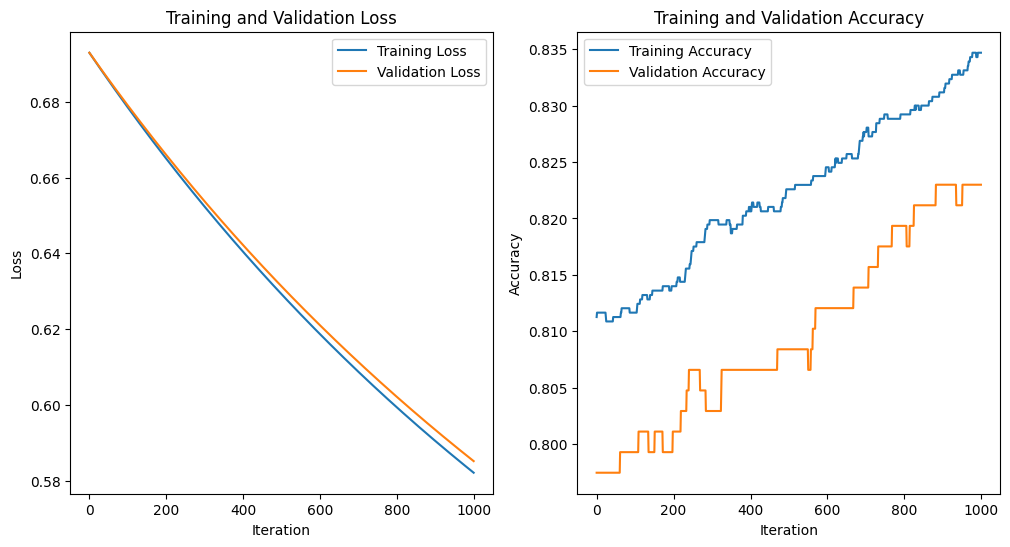

In [ ]:
# Training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

alpha = 0.01 , epochs = 1000

In [ ]:
weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression_batch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=0.01, num_iterations=1000)

Iteration 0: Train Loss: 0.691653807385674, Validation Loss: 0.6917083065823056, Train Accuracy: 0.8112543962485346, Validation Accuracy: 0.7974452554744526
Iteration 100: Train Loss: 0.5811434936152012, Validation Loss: 0.5842301633579723, Train Accuracy: 0.8347010550996483, Validation Accuracy: 0.8248175182481752
Iteration 200: Train Loss: 0.5174521158562517, Validation Loss: 0.5206357851259947, Train Accuracy: 0.8405627198124267, Validation Accuracy: 0.843065693430657
Iteration 300: Train Loss: 0.4775583695908199, Validation Loss: 0.4798637184158546, Train Accuracy: 0.8444704962876124, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.4512602273094697, Validation Loss: 0.4525513031592049, Train Accuracy: 0.8479874951152794, Validation Accuracy: 0.8485401459854015
Iteration 500: Train Loss: 0.43326567992594156, Validation Loss: 0.4336822793053429, Train Accuracy: 0.8507229386479094, Validation Accuracy: 0.8558394160583942
Iteration 600: Train Loss: 0.42057257989075

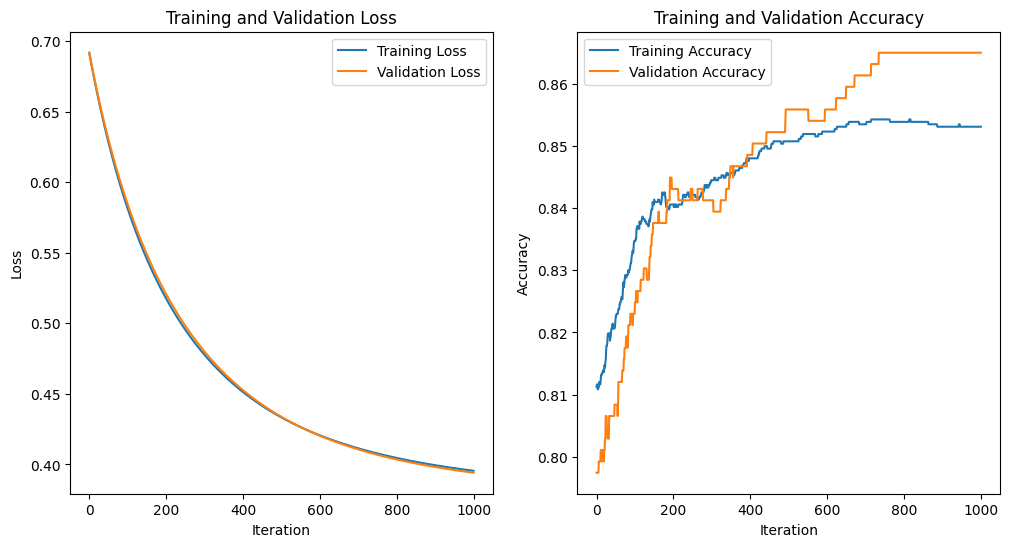

In [ ]:
# Training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## Part B : Min-Max Scaling ad No Scaling

In [ ]:
(X_train2,y_train2),(X_val2,y_val2),(X_test2,y_test2) = train_test_val_split(X,y)  # For part b

In [ ]:
X_train2

array([[  1.  ,  44.  ,   2.  , ...,  19.44,  53.  ,  87.  ],
       [  0.  ,  55.  ,   1.  , ...,  22.57,  68.  ,  77.  ],
       [  1.  ,  40.  ,   1.  , ...,  28.09,  75.  ,  66.  ],
       ...,
       [  0.  ,  47.  ,   3.  , ...,  27.13,  75.  ,  76.  ],
       [  0.  ,  46.  ,   1.  , ...,  36.81, 100.  ,  97.  ],
       [  0.  ,  56.  ,   2.  , ...,  25.38,  82.  ,  84.  ]])

In [ ]:
'''
Implementing Min-Max Scaler , here the min and max are evaluated for the training data and the tested data is fitter over it.
'''

X_min = X_train2.min(axis = 0)
X_max = X_train2.max(axis = 0)

X_train2 = (X_train2 - X_min)/(X_max-X_min)
X_val2 = (X_val2 - X_min)/(X_max-X_min)
X_test2 = (X_test2 - X_min)/(X_max-X_min)

In [ ]:

print("Scaled X_train:\n", X_train2)
print("Scaled X_val:\n", X_val2)
print("Scaled X_test:\n", X_test2)

Scaled X_train:
 [[0.         0.35135135 0.66666667 ... 0.20964615 0.36842105 0.09039548]
 [0.         0.18918919 0.33333333 ... 0.18759089 0.28421053 0.09887006]
 [1.         0.40540541 0.         ... 0.28356762 0.31578947 0.02824859]
 ...
 [0.         0.16216216 1.         ... 0.05113912 0.26315789 0.09322034]
 [0.         0.62162162 0.         ... 0.29544353 0.47368421 0.48022599]
 [0.         0.78378378 0.         ... 0.1650509  0.33684211 0.11864407]]
Scaled X_val:
 [[0.         0.59459459 0.66666667 ... 0.28138633 0.31578947 0.16101695]
 [1.         0.27027027 1.         ... 0.20431411 0.28421053 0.16101695]
 [1.         0.45945946 0.         ... 0.32283083 0.15789474 0.07909605]
 ...
 [0.         0.40540541 0.66666667 ... 0.29447407 0.52631579 0.09887006]
 [0.         0.59459459 0.         ... 0.21158507 0.36842105 0.14124294]
 [1.         0.45945946 1.         ... 0.25109064 0.49473684 0.07344633]]
Scaled X_test:
 [[1.         0.32432432 0.         ... 0.28599127 0.26315789 0.1

In [ ]:
weights2, bias2, train_losses2, val_losses2, train_accuracies2, val_accuracies2 = logistic_regression_batch(
    X_train2, y_train2, X_val2, y_val2, X_test2, y_test2, learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.6928978046734698, Validation Loss: 0.6929020502002038, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.6693904300068714, Validation Loss: 0.6697865799299748, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.648495526355089, Validation Loss: 0.6492246861602166, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.6299098709420121, Validation Loss: 0.6309210500563237, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.6133621449121242, Validation Loss: 0.6146113590837271, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 500: Train Loss: 0.598611234924351, Validation Loss: 0.6000606532131487, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 600: Train Loss: 0.585443980235473

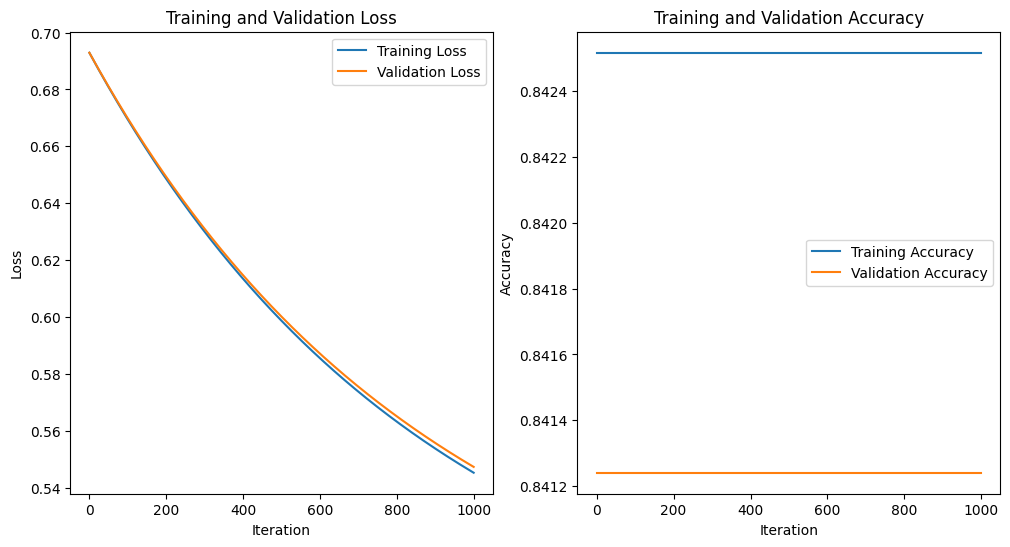

In [ ]:
# Training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses2, label='Training Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies2, label='Training Accuracy')
plt.plot(val_accuracies2, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
weighst2, bias2, train_losses2, val_losses2, train_accuracies2, val_accuracies2 = logistic_regression_batch(
    X_train2, y_train2, X_val2, y_val2,X_test2,y_test2, learning_rate=0.01, num_iterations=1000)

Iteration 0: Train Loss: 0.6906600533912384, Validation Loss: 0.690702339474127, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.5442609747902807, Validation Loss: 0.5463177237744916, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.4938619639175155, Validation Loss: 0.4961530136338086, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.4732571111167159, Validation Loss: 0.475430725449503, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.4633623310030157, Validation Loss: 0.46537207639280215, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 500: Train Loss: 0.45782015244900937, Validation Loss: 0.45968271837870456, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 600: Train Loss: 0.454219256762

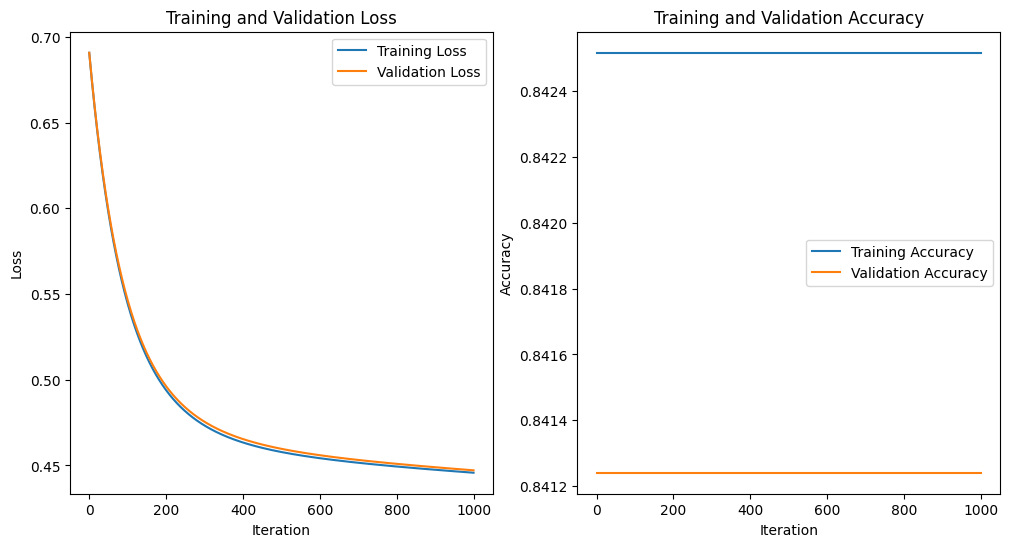

In [ ]:
# training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses2, label='Training Loss')
plt.plot(val_losses2, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies2, label='Training Accuracy')
plt.plot(val_accuracies2, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

### Following graphs show that Min-Max scaling is a better apporach than standard scaling since the features also didnot folowed the gaussian distributions

### No scaling

In [ ]:
weights3, bias3 , train_losses3, val_losses3, train_accuracies3, val_accuracies3 = logistic_regression_batch(
    X_train3, y_train3, X_val3, y_val3, X_test3,y_test3, learning_rate=0.001, num_iterations=200)

Iteration 0: Train Loss: 3.0854100375359836, Validation Loss: 2.9874781050871646, Train Accuracy: 0.8511137162954279, Validation Accuracy: 0.8558394160583942
Iteration 100: Train Loss: 3.0854100375359836, Validation Loss: 2.9874781050871646, Train Accuracy: 0.8511137162954279, Validation Accuracy: 0.8558394160583942

Final Test Accuracy: 0.8233151183970856


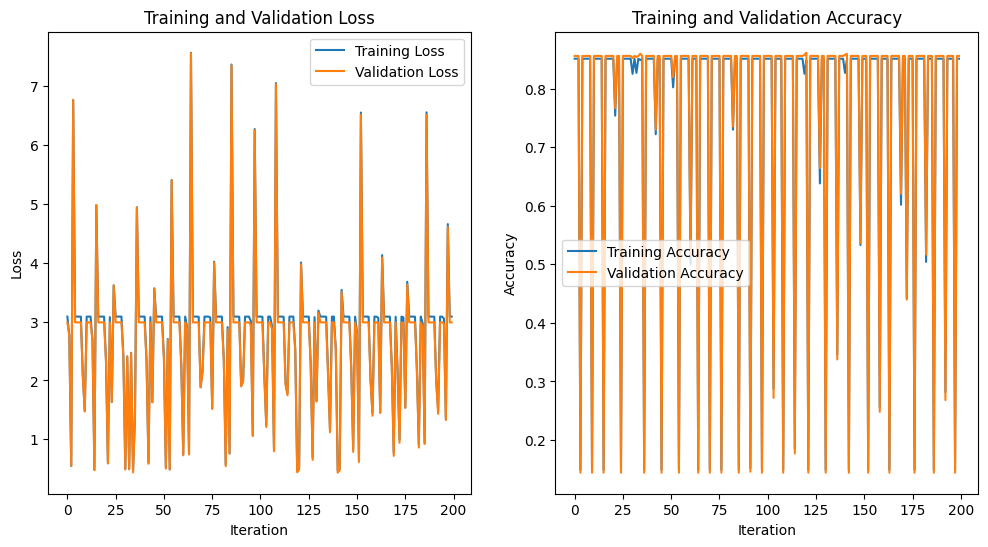

In [ ]:
# training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses3, label='Training Loss')
plt.plot(val_losses3, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies3, label='Training Accuracy')
plt.plot(val_accuracies3, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
weights3, bias3, train_losses3, val_losses3, train_accuracies3, val_accuracies3 = logistic_regression_batch(
    X_train3, y_train3, X_val3, y_val3, X_test3,y_test3, learning_rate=0.0005, num_iterations=200)

Iteration 0: Train Loss: 2.555457956522989, Validation Loss: 2.5568753408567124, Train Accuracy: 0.8511137162954279, Validation Accuracy: 0.8558394160583942
Iteration 100: Train Loss: 2.266655237167299, Validation Loss: 2.2590138508872646, Train Accuracy: 0.8511137162954279, Validation Accuracy: 0.8558394160583942

Final Test Accuracy: 0.8233151183970856


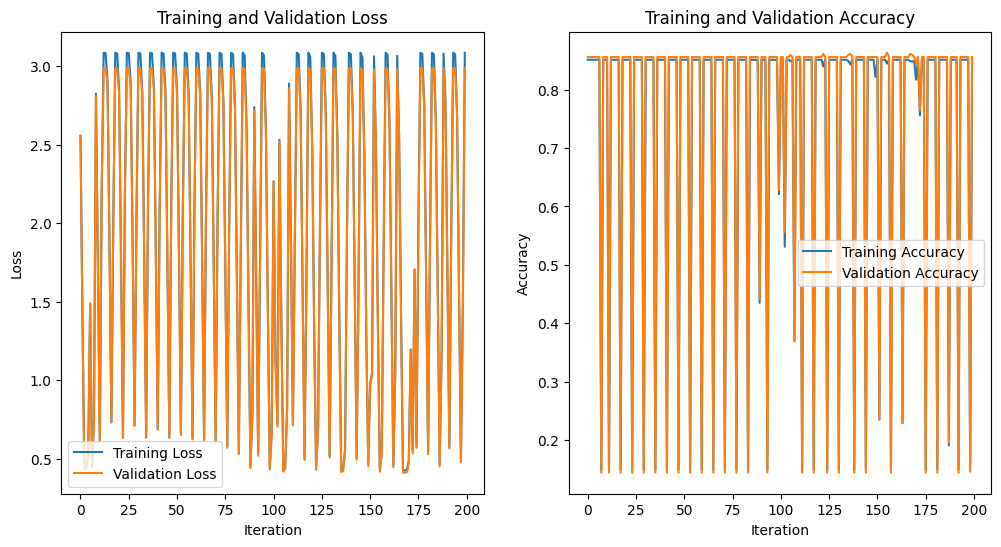

In [ ]:
# training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses3, label='Training Loss')
plt.plot(val_losses3, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies3, label='Training Accuracy')
plt.plot(val_accuracies3, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

### Key Observations Obtained : The graphs are a lot noisy showing that No scaling is not a good approach however Min-Max scaling is a far better approach because of the reason stated above

### Part C

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
'''
Here the confusion matrix , accuracy , f1 score , precision , recall etc are being implemented
'''
# Confusion matrix function
def confusion_matrix(y, y_pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            FN += 1
    return TP, TN, FP, FN

# Accuracy function
def accuracy2(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

# Precision function
def precision(TP, FP):
    return TP / (TP + FP) if (TP + FP) != 0 else 0

# Recall function
def recall(TP, FN):
    return TP / (TP + FN) if (TP + FN) != 0 else 0

# F1 score function
def f1_score(prec, rec):
    return 2 * prec * rec / (prec + rec) if (prec + rec) != 0 else 0

def LR(X_test, y_test, weights, bias):

    # Calculating predicted probabilities
    y_test_pred = sigmoid(np.dot(X_test, weights) + bias)

    y_test_pred_class = [1 if i > 0.5 else 0 for i in y_test_pred]

    # Confusion matrix for test set
    TP, TN, FP, FN = confusion_matrix(y_test, y_test_pred_class)

    # Metrics
    test_accuracy = accuracy2(TP, TN, FP, FN)
    test_precision = precision(TP, FP)
    test_recall = recall(TP, FN)
    test_f1 = f1_score(test_precision, test_recall)
    test_auc = roc_auc_score(y_test, y_test_pred)

    print("\nTest Results:")
    print(f"Validation Set Accuracy: {test_accuracy}")
    print(f"Validation Set Precision: {test_precision}")
    print(f"Validation Set Recall: {test_recall}")
    print(f"Validation Set F1 Score: {test_f1}")
    print(f"Validation Set ROC-AUC Score: {test_auc}")

    return weights , bias , test_accuracy, test_precision, test_recall, test_f1, test_auc

In [ ]:
weights4 , bias4 , train_losses4, val_losses4, train_accuracies4, val_accuracies4 = logistic_regression_batch(
    X_train4, y_train4, X_val4, y_val4, X_test4, y_test4, learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.6929940030184948, Validation Loss: 0.692994519957716, Train Accuracy: 0.8167252833137945, Validation Accuracy: 0.8321167883211679
Iteration 100: Train Loss: 0.6781758889560073, Validation Loss: 0.6782456103922057, Train Accuracy: 0.8194607268464243, Validation Accuracy: 0.8302919708029197
Iteration 200: Train Loss: 0.6642910397455044, Validation Loss: 0.6644606500968925, Train Accuracy: 0.8229777256740914, Validation Accuracy: 0.8302919708029197
Iteration 300: Train Loss: 0.6512617706321804, Validation Loss: 0.651556652801968, Train Accuracy: 0.8280578350918327, Validation Accuracy: 0.8321167883211679
Iteration 400: Train Loss: 0.6390179530371339, Validation Loss: 0.6394589852616772, Train Accuracy: 0.8292301680343884, Validation Accuracy: 0.833941605839416
Iteration 500: Train Loss: 0.6274963488015357, Validation Loss: 0.6281006057787129, Train Accuracy: 0.8327471668620555, Validation Accuracy: 0.833941605839416
Iteration 600: Train Loss: 0.6166399521208505,

In [ ]:
weights, bias , test_accuracy, test_precision, test_recall, test_f1, test_auc = LR(
    X_val4, y_val4, weights4, bias4
)


Test Results:
Validation Set Accuracy: 0.8266423357664233
Validation Set Precision: 0.40425531914893614
Validation Set Recall: 0.22093023255813954
Validation Set F1 Score: 0.2857142857142857
Validation Set ROC-AUC Score: 0.7255360918151615


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.87      0.94      0.90       462
     Class 1       0.40      0.22      0.29        86

    accuracy                           0.83       548
   macro avg       0.64      0.58      0.59       548
weighted avg       0.79      0.83      0.80       548



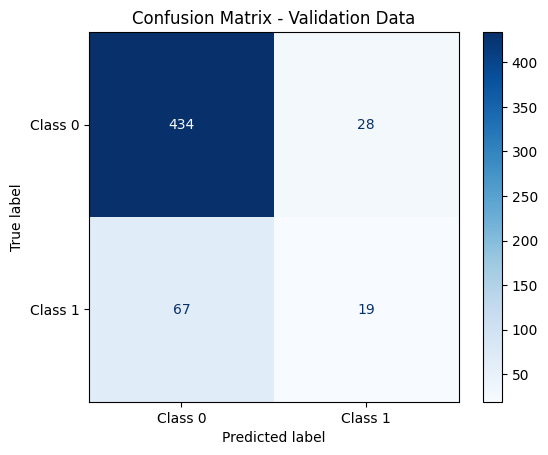

In [ ]:

y_val_pred = sigmoid(np.dot(X_val4, weights4) + bias4)
y_res = [1 if i >= 0.5 else 0 for i in y_val_pred]
report = classification_report(y_val4, y_res, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

#confusion matrix
cm = confusion_matrix(y_val4, y_res, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Data")
plt.show()

In [ ]:
weights26 , bias26 , train_losses26, val_losses26, train_accuracies26, val_accuracies26 = logistic_regression_batch(
    X_train, y_train, X_val, y_val, X_test, y_test, learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.6929976162879273, Validation Loss: 0.6930030594269606, Train Accuracy: 0.8112543962485346, Validation Accuracy: 0.7974452554744526
Iteration 100: Train Loss: 0.6785356012884132, Validation Loss: 0.6790574544978931, Train Accuracy: 0.8116451738960532, Validation Accuracy: 0.7992700729927007
Iteration 200: Train Loss: 0.6649962028315808, Validation Loss: 0.6659805275045468, Train Accuracy: 0.8139898397811646, Validation Accuracy: 0.801094890510949
Iteration 300: Train Loss: 0.6523014099072587, Validation Loss: 0.6536965487393526, Train Accuracy: 0.819851504493943, Validation Accuracy: 0.8029197080291971
Iteration 400: Train Loss: 0.6403809081769116, Validation Loss: 0.642137818014341, Train Accuracy: 0.82063305978898, Validation Accuracy: 0.8065693430656934
Iteration 500: Train Loss: 0.6291713949120918, Validation Loss: 0.6312438769593309, Train Accuracy: 0.8225869480265728, Validation Accuracy: 0.8083941605839416
Iteration 600: Train Loss: 0.6186159007893979, 

In [ ]:
weights26, bias26 , test_accuracy26, test_precision26, test_recall26, test_f126, test_auc26 = LR(
    X_val4, y_val4, weights4, bias4
)


Test Results:
Validation Set Accuracy: 0.8266423357664233
Validation Set Precision: 0.40425531914893614
Validation Set Recall: 0.22093023255813954
Validation Set F1 Score: 0.2857142857142857
Validation Set ROC-AUC Score: 0.7255360918151615


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.88      0.93      0.90       471
     Class 1       0.32      0.21      0.25        77

    accuracy                           0.83       548
   macro avg       0.60      0.57      0.58       548
weighted avg       0.80      0.83      0.81       548



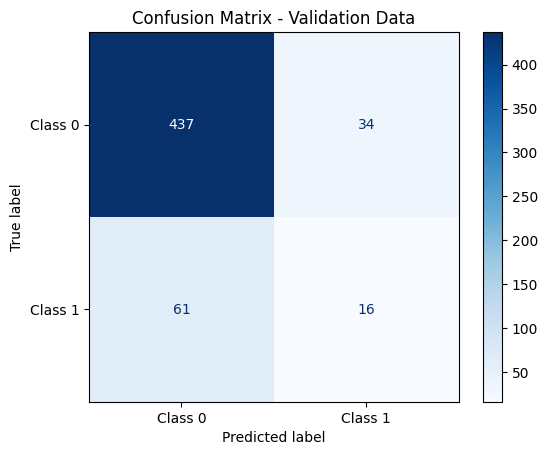

In [ ]:
y_val_pred26 = sigmoid(np.dot(X_val, weights26) + bias26)
y_res26 = [1 if i >= 0.5 else 0 for i in y_val_pred26]
report = classification_report(y_val, y_res26, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

#confusion matrix
cm = confusion_matrix(y_val, y_res26, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Data")
plt.show()

### Part D : These have been implemented on the data which has been scaled using Min-Max scaling since its a better scaling method than standard scaling , also the graphs very more presentatble and moise when I drew them with this scaling

In [ ]:
'''
Implementation of Stochastic Gradient Descent and Mini-Batch Gradient Descent
'''

'''
These functions are same as implemented in batch gradient descent
'''
# calculating the derivatives
def derivatives(y_pred,X_alone,y_alone):

    dw = np.dot(X_alone.T, y_pred - y_alone)
    db = np.sum(y_pred - y_alone)

    return dw,db

# calculating the losses
def losses(y_train,y_val,y_train_pred,y_val_pred):

    train_loss = cross_entropy_loss(y_train, y_train_pred)
    val_loss = cross_entropy_loss(y_val, y_val_pred)

    return train_loss,val_loss

# calculatind the accuracies
def accuracies(y_train_pred,y_train,y_val,y_val_pred):

    train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
    val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

    return train_accuracy,val_accuracy


def logistic_regression_sgd(X_train, y_train, X_val, y_val,X_test,y_test ,learning_rate, num_iterations=1000):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):
        # Shuffling the data
        index = np.arange(m)
        np.random.shuffle(index)
        X_train = X_train[index]
        y_train = y_train[index]

        for j in range(m):

            # Selecting single example
            X_alone = X_train[j:j+1]
            y_alone = y_train[j:j+1]

            y_pred = sigmoid(np.dot(X_alone, weights) + bias)

            dw,db = derivatives(y_pred,X_alone,y_alone)

            # Updating the weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Calculating losses and accuracies
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss,val_loss = losses(y_train,y_val,y_train_pred,y_val_pred)
        train_accuracy,val_accuracy = accuracies(y_train_pred,y_train,y_val,y_val_pred)


        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    y_test_pred = sigmoid(np.dot(X_test, weights) + bias)
    test_accuracy = accuracy(y_test, y_test_pred)

    print()
    print(f"Final Test Accuracy: {test_accuracy}")

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
train_losses5, val_losses5, train_accuracies5, val_accuracies5 = logistic_regression_sgd(
    X_train2, y_train2, X_val2, y_val2,X_test2,y_test2 ,learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.47927703362438373, Validation Loss: 0.4815276152877156, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.3945425442818839, Validation Loss: 0.3931524847433188, Train Accuracy: 0.8452520515826495, Validation Accuracy: 0.843065693430657
Iteration 200: Train Loss: 0.3894390083320294, Validation Loss: 0.3887793594295831, Train Accuracy: 0.8464243845252052, Validation Accuracy: 0.843065693430657
Iteration 300: Train Loss: 0.3875550844595655, Validation Loss: 0.3876516119287058, Train Accuracy: 0.8468151621727237, Validation Accuracy: 0.8448905109489051
Iteration 400: Train Loss: 0.38659242945020666, Validation Loss: 0.38714282460348004, Train Accuracy: 0.8491598280578351, Validation Accuracy: 0.8485401459854015
Iteration 500: Train Loss: 0.38601933658843185, Validation Loss: 0.38694911649044034, Train Accuracy: 0.848378272762798, Validation Accuracy: 0.8485401459854015
Iteration 600: Train Loss: 0.38564871903

#### Noisy convergence

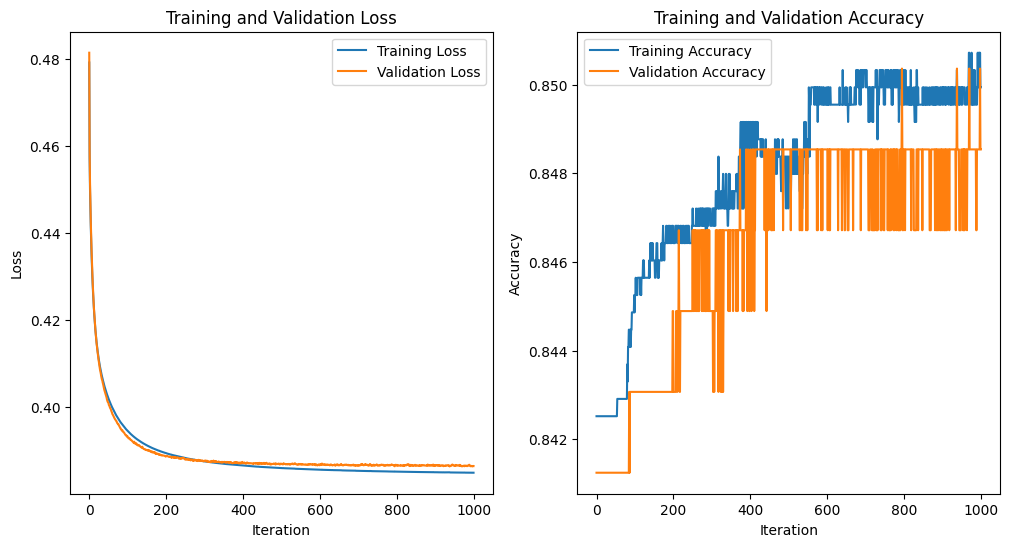

In [ ]:
# training and validation losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses5, label='Training Loss')
plt.plot(val_losses5, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies5, label='Training Accuracy')
plt.plot(val_accuracies5, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
'''
These functions are same as implemented in batch gradient descent
'''
# calculating the derivatives
def derivatives(batch_size,X_batch,y_pred,y_batch):

    dw = (1 / batch_size) * np.dot(X_batch.T,  y_pred - y_batch)
    db = (1 / batch_size) * np.sum( y_pred - y_batch)

    return dw,db

# calculating the losses
def losses(y_train,y_val,y_val_pred,y_train_pred):

    train_loss = cross_entropy_loss(y_train, y_train_pred)
    val_loss = cross_entropy_loss(y_val, y_val_pred)

    return train_loss,val_loss

# calculating the losses
def accuracies(y_train,y_val,y_train_pred,y_val_pred):
    train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
    val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

    return train_accuracy,val_accuracy



def logistic_regression_mini_batch(X_train, y_train, X_val, y_val,X_test,y_test ,learning_rate, num_iterations=1000, batch_size=32):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    #epochs iterations
    for i in range(num_iterations):
        index = np.arange(m)
        np.random.shuffle(index)
        X_train = X_train[index]
        y_train = y_train[index]

        #batch iterations
        for j in range(0, m, batch_size):
            end = min(i + batch_size, m)
            X_batch = X_train[i:end]
            y_batch = y_train[i:end]

            y_pred = sigmoid(np.dot(X_batch, weights) + bias)

            dw,db = derivatives(batch_size,X_batch,y_pred,y_batch)

            weights -= learning_rate * dw
            bias -= learning_rate * db

        # predicted y's
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss,val_loss = losses(y_train,y_val,y_val_pred,y_train_pred)
        train_accuracy,val_accuracy = accuracies(y_train,y_val,y_train_pred,y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    y_test_pred = sigmoid(np.dot(X_test, weights) + bias)
    test_accuracy = accuracy(y_test, y_test_pred)

    print()
    print(f"Final Test Accuracy: {test_accuracy}")

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
train_losses6, val_losses6, train_accuracies6, val_accuracies6 = logistic_regression_mini_batch(
    X_train2, y_train2, X_val2, y_val2,X_test2,y_test2, learning_rate=0.001, num_iterations=1000)

Iteration 0: Train Loss: 0.6728812486051575, Validation Loss: 0.6732670901657692, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.4515447669231657, Validation Loss: 0.45340829097167773, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.4393923077224219, Validation Loss: 0.4406201610971904, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.430902255181644, Validation Loss: 0.43183099601431285, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.4247905058503092, Validation Loss: 0.4251926212337528, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 500: Train Loss: 0.4206451504883316, Validation Loss: 0.42021726303716245, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 600: Train Loss: 0.41666599694

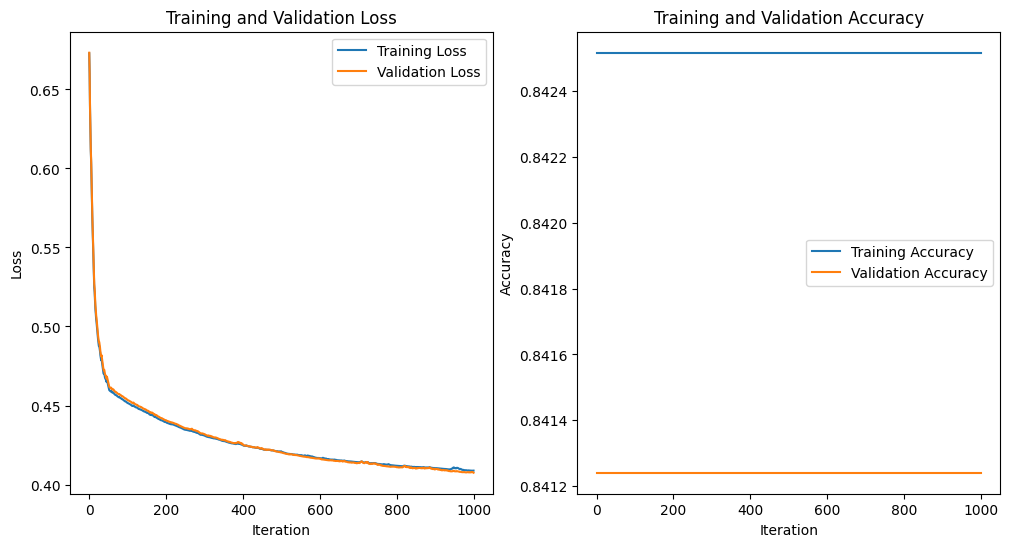

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses6, label='Training Loss')
plt.plot(val_losses6, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_accuracies6, label='Training Accuracy')
plt.plot(val_accuracies6, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
train_losses13, val_losses13, train_accuracies13, val_accuracies13 = logistic_regression_mini_batch(
    X_train2, y_train2, X_val2, y_val2,X_test2,y_test2, learning_rate=0.01, num_iterations=1000,batch_size = 64)

Iteration 0: Train Loss: 0.6185287450522247, Validation Loss: 0.6198115356874211, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.41967257048335144, Validation Loss: 0.4195672663241854, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.4084707857732343, Validation Loss: 0.4068676459492038, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.4037584439474241, Validation Loss: 0.40344458053094107, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.39976460875963393, Validation Loss: 0.39836459948709874, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 500: Train Loss: 0.39864082053985167, Validation Loss: 0.3983888350771104, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 600: Train Loss: 0.39579066

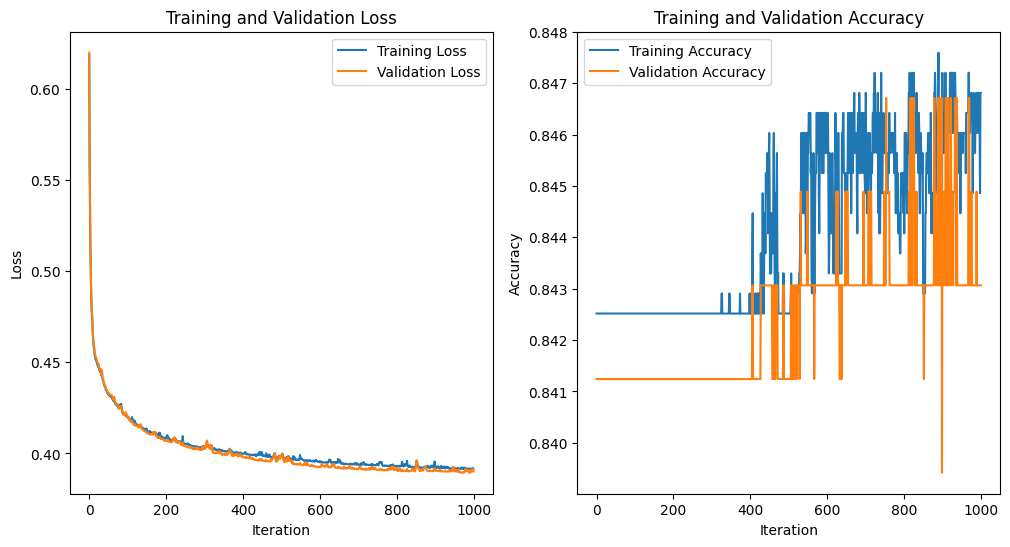

In [ ]:
plt.figure(figsize=(12, 6))

# training and testing losses
plt.subplot(1, 2, 1)
plt.plot(train_losses13, label='Training Loss')
plt.plot(val_losses13, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and testing accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies13, label='Training Accuracy')
plt.plot(val_accuracies13, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## Part F : K Fold cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# calculating the derivatives
def derivatives(m,X_train,y_train,y_pred):

    dw = (1 / m) * np.dot(X_train.T, y_pred - y_train)
    db = (1 / m) * np.sum(y_pred - y_train)

    return dw,db

# calculating the losses
def losses(y_train,y_train_pred,y_val,y_val_pred):

    train_loss = cross_entropy_loss(y_train, y_train_pred)
    val_loss = cross_entropy_loss(y_val, y_val_pred)

    return train_loss , val_loss

# calculating the accuracies
def accuracies(y_train_pred,y_val,y_train,y_val_pred):

    train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
    val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

    return train_accuracy , val_accuracy

def logistic_regression_batch2(X_train, y_train, X_val, y_val, learning_rate, num_iterations=1000):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):

        y_pred = sigmoid(np.dot(X_train, weights) + bias)

        '''
        Computing the gradients
        '''
        dw,db = derivatives(m,X_train,y_train,y_pred)

        '''
        Updating the weights
        '''

        weights -= learning_rate * dw
        bias -= learning_rate * db

        '''
        calculating the loss and accuracies
        '''

        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss , val_loss = losses(y_train,y_train_pred,y_val,y_val_pred)

        train_accuracy , val_accuracy = accuracies(y_train_pred,y_val,y_train,y_val_pred)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return weights, bias, val_accuracies

In [ ]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# The number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(X1, k)

### Directly taken from the reference stated below

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def perform_kfold_cross_validation(X, y, num_folds=5, learning_rate=0.001, num_iterations=1000):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold = 1
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    scaler = StandardScaler()

    for train_index, val_index in fold_indices:
        # Spliting the data into training and validation sets for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Scaling the data
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        weights, bias, val_accuracies = logistic_regression_batch2(
            X_train_scaled, y_train, X_val_scaled, y_val, learning_rate, num_iterations
        )

        # Evaluating on validation data
        y_val_pred_prob = sigmoid(np.dot(X_val_scaled, weights) + bias)
        y_val_pred = [1 if i >= 0.5 else 0 for i in y_val_pred_prob]

        #Accuracies for this particular fold
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        print(f"Fold {fold}: Validation Accuracy: {accuracy}")
        fold += 1

    print(f"  Cross-Validation Results (Accuracy per fold): {accuracies}")
    print(f"  Mean Accuracy across folds: {np.mean(accuracies)}")
    print(f"  Mean Precision: {np.mean(precisions)}")
    print(f"  Mean Recall: {np.mean(recalls)}")
    print(f"  Mean F1 Score: {np.mean(f1_scores)}")
    print(f"  Standard Deviation of Accuracy: {np.std(accuracies)}")
    print(f"  Standard Deviation of Precision: {np.std(precisions)}")
    print(f"  Standard Deviation of Recall: {np.std(recalls)}")
    print(f"  Standard Deviation of F1 Score: {np.std(f1_scores)}")

In [ ]:
perform_kfold_cross_validation(X1,y1)

Fold 1: Validation Accuracy: 0.8235294117647058
Fold 2: Validation Accuracy: 0.8467852257181943
Fold 3: Validation Accuracy: 0.8290013679890561
Fold 4: Validation Accuracy: 0.853625170998632
Fold 5: Validation Accuracy: 0.813953488372093
  Cross-Validation Results (Accuracy per fold): [0.8235294117647058, 0.8467852257181943, 0.8290013679890561, 0.853625170998632, 0.813953488372093]
  Mean Accuracy across folds: 0.8333789329685362
  Mean Precision: 0.4077249415072822
  Mean Recall: 0.1920311584936441
  Mean F1 Score: 0.25868132189617377
  Standard Deviation of Accuracy: 0.014718443399521495
  Standard Deviation of Precision: 0.049403472686385265
  Standard Deviation of Recall: 0.029427420283132732
  Standard Deviation of F1 Score: 0.027995704664269566


#### Reference :  https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d


## Part G : Stochastic Gradient Descent performed better in most cases. However , both mini-batch and sgd gave almost same testing accuracy

For Lasso Regularization

In [ ]:
'''
Implemented it using stochastic gradient descent method
'''
# calculating the loss
def cross_entropy_loss_l1(y, y_hat, reg_parameter, weights):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)) + reg_parameter * np.sum(np.abs(weights)) # updating loss here

def logistic_regression_l1(X_train, y_train, X_val, y_val ,learning_rate, num_iterations=1000,patience=10, l1_reg=0 ):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):

        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for j in range(m):

            X_single = X_train[j:j+1]
            y_single = y_train[j:j+1]


            y_pred = sigmoid(np.dot(X_single, weights) + bias)

            dw = np.dot(X_single.T, y_pred - y_single) + l1_reg * np.sign(weights) # updating weights here
            db = np.sum(y_pred - y_single)


            weights -= learning_rate * dw
            bias -= learning_rate * db

        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss_l1(y_train, y_train_pred,l1_reg,weights)
        val_loss = cross_entropy_loss_l1(y_val, y_val_pred,l1_reg,weights)

        train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
        val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")


    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
def logistic_regression_l1_2(X_train, y_train, X_val, y_val ,learning_rate, num_iterations=1000,batch_size = 32, patience=10, l1_reg=0 ):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = np.inf
    no_improv = 0

    for i in range(num_iterations):

        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for j in range(m):
            # Selecting single example
            X_single = X_train[j:j+1]
            y_single = y_train[j:j+1]


            y_pred = sigmoid(np.dot(X_single, weights) + bias)

            dw = np.dot(X_single.T, y_pred - y_single) + l1_reg * np.sign(weights)
            db = np.sum(y_pred - y_single)

            # Updating weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        #losses and accuracies
        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss_l1(y_train, y_train_pred,l1_reg,weights)
        val_loss = cross_entropy_loss_l1(y_val, y_val_pred,l1_reg,weights)

        train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
        val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

        # Early Stopping based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve = 0
        else:
            no_improve += 1

        if no_improve >= patience:
            print(f"Early stopping on iteration {i} due to no improvement in validation loss.")
            break

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
weights7, bias7, train_losses7, val_losses7, train_accuracies7, val_accuracies7 = logistic_regression_l1(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.001, num_iterations=100,l1_reg = 0.0001)

Iteration 0: Train Loss: 0.47952720814751504, Validation Loss: 0.4817596481770543, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088


In [ ]:
weights20, bias20, train_losses20, val_losses20, train_accuracies20, val_accuracies20 = logistic_regression_l1(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.01, num_iterations=500,l1_reg = 0.1)

Iteration 0: Train Loss: 0.4379397560730021, Validation Loss: 0.4400644288155388, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.4368443674036253, Validation Loss: 0.4389987121472489, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.44159420960813384, Validation Loss: 0.4438141590669828, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.4368619881101238, Validation Loss: 0.43895622012624197, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.4370954544398881, Validation Loss: 0.4392085993969969, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088


In [ ]:
weights21, bias21, train_losses21, val_losses21, train_accuracies21, val_accuracies21 = logistic_regression_l1(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.001, num_iterations=200,l1_reg = 0.01)

Iteration 0: Train Loss: 0.4983140776020621, Validation Loss: 0.5004021409960024, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.42361266824656685, Validation Loss: 0.42782564545635016, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088


In [ ]:
def plot_performance(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over iterations')

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over iterations')

    plt.show()


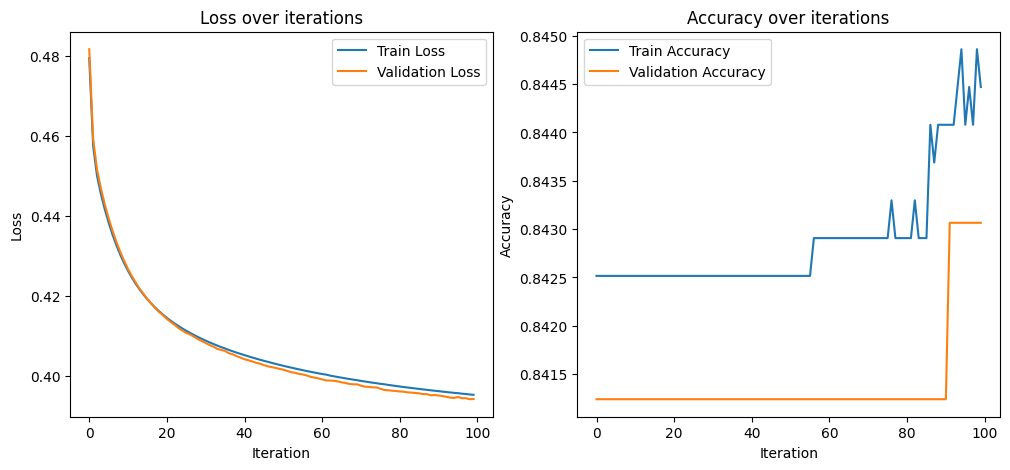

In [ ]:
plot_performance(train_losses7, val_losses7, train_accuracies7, val_accuracies7)

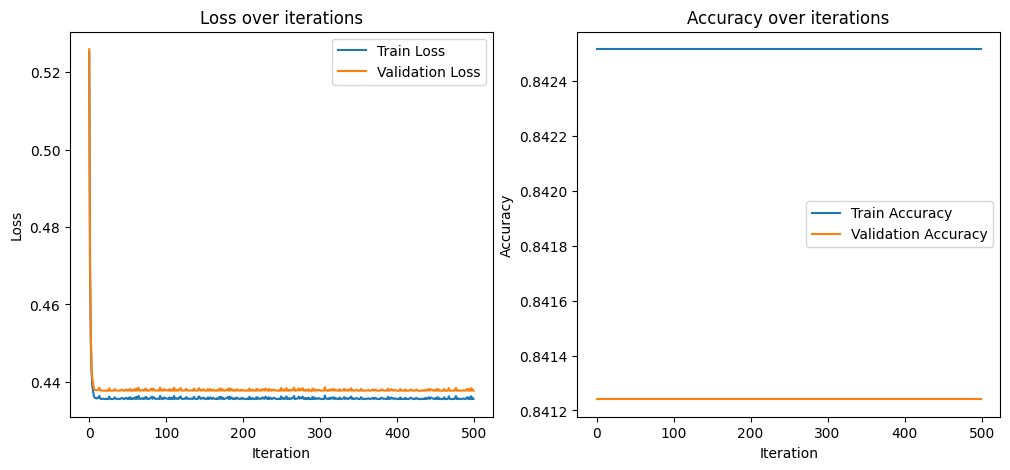

In [ ]:
plot_performance(train_losses20, val_losses20, train_accuracies20, val_accuracies20)

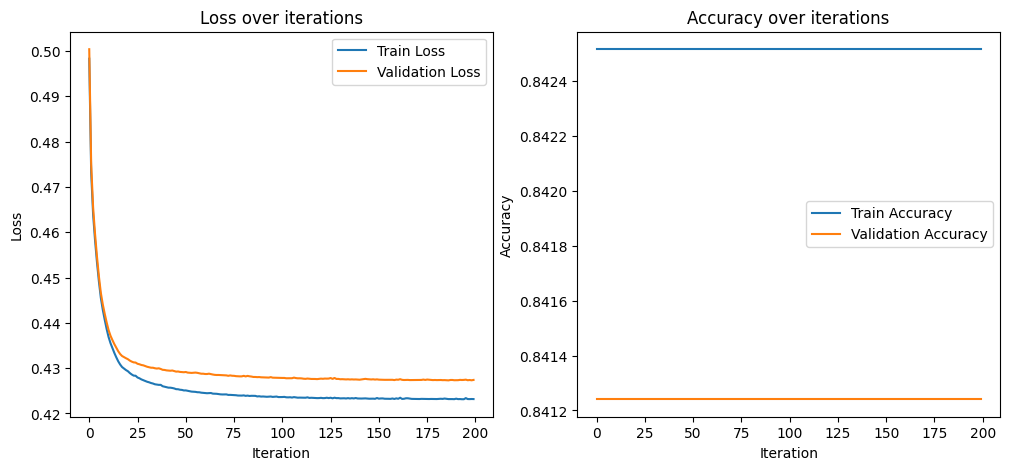

In [ ]:
plot_performance(train_losses21, val_losses21, train_accuracies21, val_accuracies21)

In [ ]:
weights8, bias8, train_losses8, val_losses8, train_accuracies8, val_accuracies8 = logistic_regression_l1_2(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.001, num_iterations=500,l1_reg = 0.001)

Iteration 0: Train Loss: 0.48451223505295643, Validation Loss: 0.4866966852168787, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.39990636319895057, Validation Loss: 0.40022271403072623, Train Accuracy: 0.8429073856975381, Validation Accuracy: 0.8412408759124088
Early stopping on iteration 176 due to no improvement in validation loss.


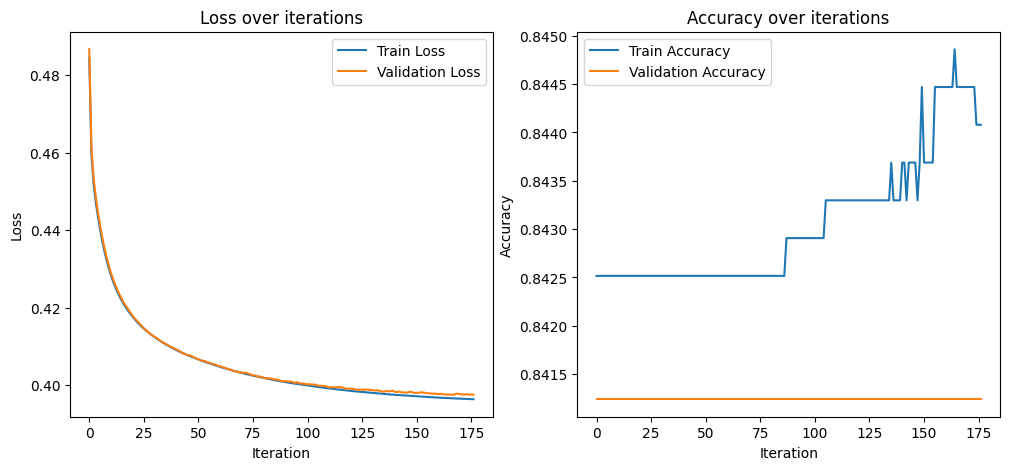

In [ ]:
plot_performance(train_losses8, val_losses8, train_accuracies8, val_accuracies8)

 Early stopping occurs after 176 iterations with alpha = 0.001

For ridge regression

In [ ]:
'''
Same as implemented above but just using l2 regularization paramter
'''
# calculating the loss
def cross_entropy_loss_l2(y, y_hat, reg_parameter, weights):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)) + reg_parameter * np.sum(np.square(weights)) # l2 reularization

def logistic_regression_l2(X_train, y_train, X_val, y_val ,learning_rate, num_iterations=1000,patience=10, l2_reg=0 ):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iterations):

        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for j in range(m):

            X_single = X_train[j:j+1]
            y_single = y_train[j:j+1]


            y_pred = sigmoid(np.dot(X_single, weights) + bias)

            dw = np.dot(X_single.T, y_pred - y_single) + 2*l2_reg * np.sign(weights)  # l2 reularization derivative
            db = np.sum(y_pred - y_single)

            weights -= learning_rate * dw
            bias -= learning_rate * db

        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss_l1(y_train, y_train_pred,l2_reg,weights)
        val_loss = cross_entropy_loss_l1(y_val, y_val_pred,l2_reg,weights)

        train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
        val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")


    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
def logistic_regression_l2_2(X_train, y_train, X_val, y_val ,learning_rate, num_iterations=1000,patience=10, l2_reg=0 ):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = np.inf
    no_improvement_count = 0


    for i in range(num_iterations):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        for j in range(m):
            X_single = X_train[j:j+1]
            y_single = y_train[j:j+1]


            y_pred = sigmoid(np.dot(X_single, weights) + bias)

            dw = np.dot(X_single.T, y_pred - y_single) + 2*l2_reg * np.sign(weights)
            db = np.sum(y_pred - y_single)


            weights -= learning_rate * dw
            bias -= learning_rate * db


        y_train_pred = sigmoid(np.dot(X_train, weights) + bias)
        y_val_pred = sigmoid(np.dot(X_val, weights) + bias)

        train_loss = cross_entropy_loss_l1(y_train, y_train_pred,l2_reg,weights)
        val_loss = cross_entropy_loss_l1(y_val, y_val_pred,l2_reg,weights)

        train_accuracy = np.mean((y_train_pred > 0.5) == y_train)
        val_accuracy = np.mean((y_val_pred > 0.5) == y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss}, Validation Loss: {val_loss}, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

        # Early Stopping based on validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"Early stopping on iteration {i} due to no improvement in validation loss.")
            break

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
weights9, bias9, train_losses9, val_losses9, train_accuracies9, val_accuracies9 = logistic_regression_l2(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.001, num_iterations=500,l2_reg = 0.001)

Iteration 0: Train Loss: 0.4835215354567905, Validation Loss: 0.4857108633568348, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.40051837838308124, Validation Loss: 0.4024749373315803, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.3971292763584721, Validation Loss: 0.3998791469051046, Train Accuracy: 0.8429073856975381, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.3963702149994941, Validation Loss: 0.3991651115304523, Train Accuracy: 0.8440797186400938, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.3960431906602052, Validation Loss: 0.3994103729138393, Train Accuracy: 0.8436889409925752, Validation Accuracy: 0.8412408759124088


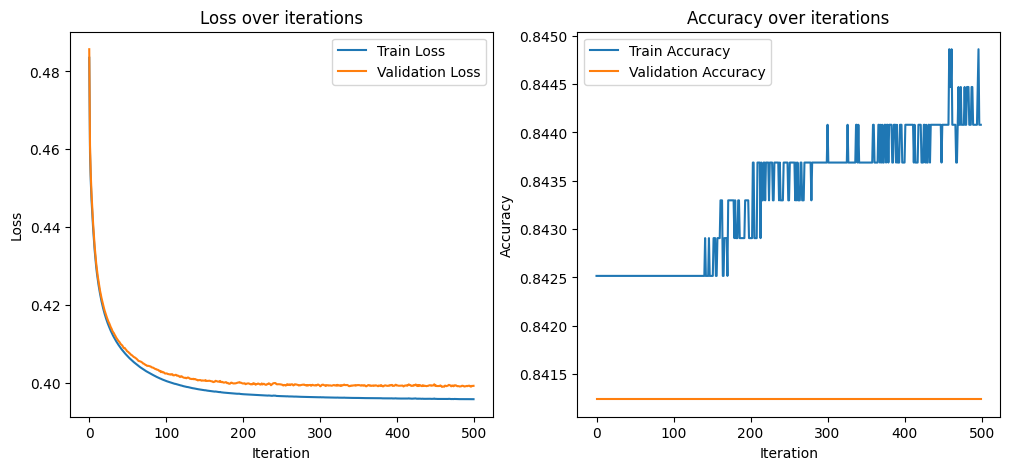

In [ ]:
plot_performance(train_losses9, val_losses9, train_accuracies9, val_accuracies9)

In [ ]:
weights99, bias99, train_losses99, val_losses99, train_accuracies99, val_accuracies99 = logistic_regression_l2(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.01, num_iterations=500,l2_reg = 0.001)

Iteration 0: Train Loss: 0.4310008705289804, Validation Loss: 0.43212593953915673, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Iteration 100: Train Loss: 0.3957056119858707, Validation Loss: 0.399813544320733, Train Accuracy: 0.8432981633450567, Validation Accuracy: 0.8412408759124088
Iteration 200: Train Loss: 0.39535055022192744, Validation Loss: 0.3989717549760994, Train Accuracy: 0.8448612739351309, Validation Accuracy: 0.8412408759124088
Iteration 300: Train Loss: 0.39705185517465924, Validation Loss: 0.4022370454934568, Train Accuracy: 0.8429073856975381, Validation Accuracy: 0.8412408759124088
Iteration 400: Train Loss: 0.3971129639326066, Validation Loss: 0.39839287750555685, Train Accuracy: 0.8436889409925752, Validation Accuracy: 0.843065693430657


In [ ]:
weights10, bias10, train_losses10, val_losses10, train_accuracies10, val_accuracies10 = logistic_regression_l2_2(
    X_train2, y_train2, X_val2, y_val2, learning_rate=0.01, num_iterations=500,l2_reg = 0.001)

Iteration 0: Train Loss: 0.4302968845230506, Validation Loss: 0.4308503081131923, Train Accuracy: 0.8425166080500195, Validation Accuracy: 0.8412408759124088
Early stopping on iteration 39 due to no improvement in validation loss.


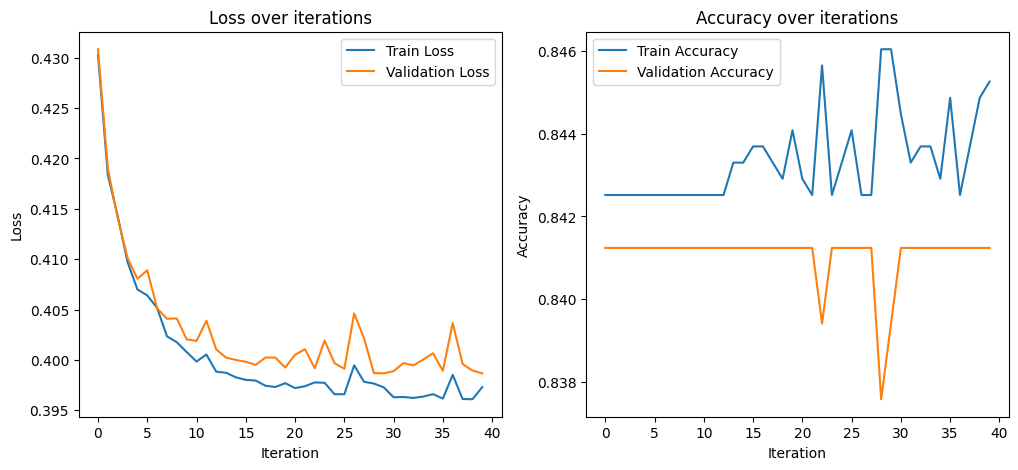

In [ ]:
plot_performance(train_losses10, val_losses10, train_accuracies10, val_accuracies10)

 Early stopping prevents the model to overfit , when there is no significant change observed in the validation which can easily be seen from the graph above.